# Weinreich's landscape

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from data_sets import *
import networkx as nx
from epistasis.models import LocalEpistasisModel, ProjectedEpistasisModel
from epistasis.plotting import epistasis_barh
from epistasis.knockout import KnockoutModel
from weinreich import *
from graph_pos import INIT_POS

Weinreich's sequence space.

In [2]:
space = WeinreichFitnesses(sequence5, rank5)
space.generate_fitnesses(100)

Track a pairwise interaction as the order of the model increases.

In [4]:
interaction = '011,041'
wildtype = '00000'
genotypes = space.sequences
phenotypes = space.fitnesses
errors = space.errors
vals = list()
for i in range(2,6):
    model = ProjectedEpistasisModel(wildtype, genotypes, phenotypes, regression_order=i, log_phenotypes=True)
    model.estimate_interactions()
    vals.append(model.get_order(2)[interaction])

Plot the interaction as model increases.

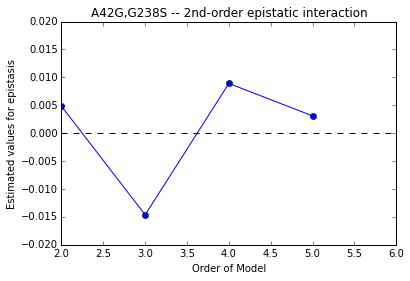

In [31]:
f = plt.figure(dpi=500)
plt.plot(range(2,6), vals, 'o-')
plt.hlines(0, 2,6, linestyles='dashed')
plt.axis([2,6,-0.02,0.02])
plt.xlabel("Order of Model")
plt.ylabel("Estimated values for epistasis")
plt.title("A42G,G238S -- 2nd-order epistatic interaction")

In [20]:
model = ProjectedEpistasisModel(wildtype, genotypes, phenotypes, regression_order=2, log_phenotypes=True)
model.estimate_interactions()
z = model.Interactions.key2value

In [16]:
model = ProjectedEpistasisModel(wildtype, genotypes, phenotypes, regression_order=6, log_phenotypes=True)
model.estimate_interactions()
y = model.Interactions.key2value

In [18]:
print(z['1'])
print(z['4'])
print(z['1,4'])

-0.00519120390742
-0.00554318014946
0.0045720673447


In [17]:
print(y['1'])
print(y['4'])
print(y['1,4'])

1.21430643318e-17
-0.00325324366594
0.00325324366594


In [33]:
f.savefig("second_order.png", dpi=500)